In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

In [9]:
df= pd.read_csv('UCI_Credit_Card.csv')

***Preliminary Data Exploration***

In [10]:
df.shape

(30000, 25)

In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [12]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [13]:
df.shape

(30000, 25)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

***Exploratory Data Analysis***

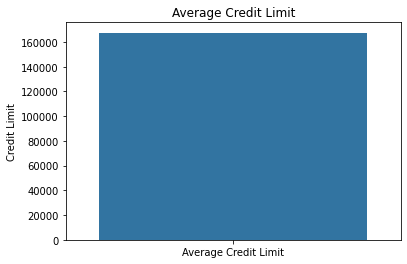

In [15]:
#Average credit limit of the dataset
avg_credit_limit= df['LIMIT_BAL'].mean()
sns.barplot(x= ['Average Credit Limit'],y= [avg_credit_limit])
plt.ylabel('Credit Limit')
plt.title('Average Credit Limit')
plt.show()

*****Credit Limit By Gender*****

In [16]:
#Average credit limit categorized by gender
males= df.loc[df['SEX'] == 1]["LIMIT_BAL"]
females= df.loc[df['SEX'] == 2]["LIMIT_BAL"]
avg_cl_males= males.mean()
avg_cl_females= females.mean()

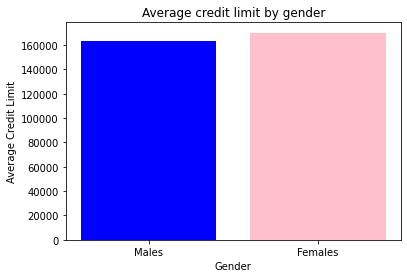

In [17]:
genders= ['Males', 'Females']
average= [avg_cl_males, avg_cl_females]
plt.bar(genders, average, color= ['blue','pink'])
plt.xlabel('Gender')
plt.ylabel('Average Credit Limit')
plt.title('Average credit limit by gender')
plt.show()

***Age wise distribution of credit limit***

In [18]:
#age-wise distribution of credit limit
bins = [20, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

df['Age Range'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

df[['AGE', 'Age Range']]

,AGE,Age Range
0,24,20-29
1,26,20-29
2,34,30-39
3,37,30-39
4,57,50-59
...,...,...
29995,39,40-49
29996,43,40-49
29997,37,30-39
29998,41,40-49


In [19]:
df['Age Range'].value_counts()

30-39    11889
20-29     8013
40-49     6966
50-59     2710
60-69      382
70-79       39
80-89        1
90-99        0
Name: Age Range, dtype: int64

In [20]:
df['Age Range'].value_counts()

30-39    11889
20-29     8013
40-49     6966
50-59     2710
60-69      382
70-79       39
80-89        1
90-99        0
Name: Age Range, dtype: int64

In [21]:
avg_credit_limit_by_age = df.groupby('Age Range')['LIMIT_BAL'].mean()

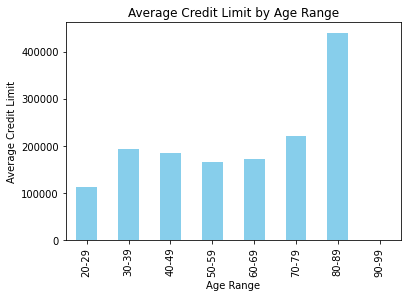

In [22]:

avg_credit_limit_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Credit Limit by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Credit Limit')
plt.show()

<AxesSubplot:>

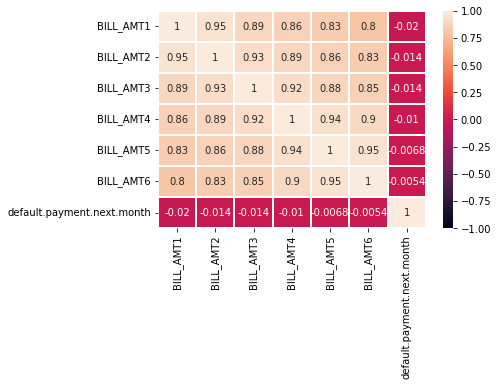

In [23]:
# understanding the correlation between bill amounts and default payment
variables = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'default.payment.next.month']
correlation= df[variables].corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)


***Correlation between payments and default payment***

<AxesSubplot:>

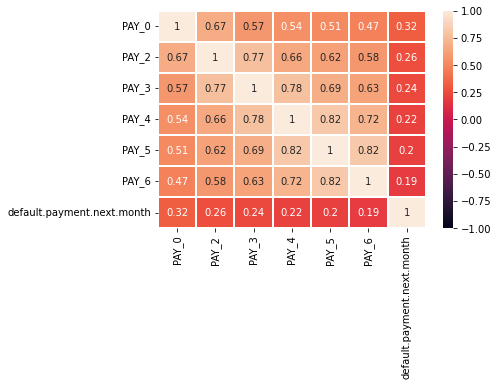

In [24]:
payments= ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default.payment.next.month']
corr1= df[payments].corr()
sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns,linewidths=.1,vmin=-1, vmax=1,annot=True)


***Predictive Analysis***

In [25]:
X= df.drop(['default.payment.next.month', 'Age Range'], axis=1)
y= df['default.payment.next.month']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



***Logistic Regression***

In [27]:
Lr= LogisticRegression()


In [28]:
Lr.fit(X_train, y_train)

c:\Users\agrim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions= Lr.predict(X_test)
accuracy= accuracy_score(y_test, predictions)
print(accuracy)

0.7811666666666667


The logistic regression model achieved an accuracy score of 0.7811666666666667 on the test dataset. This score indicates that the model correctly classified approximately 78.12% of the test instances.

In [30]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.21883333333333332
R-squared: -0.28013654789844256


The high MSE and negative R-squared indicate poor model performance. 

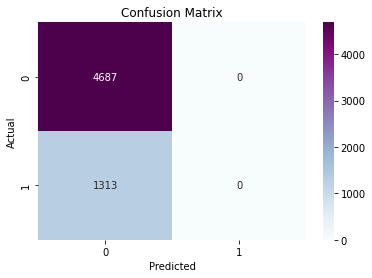

In [31]:
conf_mat2 = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat2, annot=True, fmt='d', cmap='BuPu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(f"Classification report {classification_report(y_test, predictions)}")

Classification report               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



c:\Users\agrim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\agrim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\agrim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Based on the provided classification report metrics, we can analyze the performance of the logistic regression model as follows:

```
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000
```

**Accuracy**: The overall accuracy of the model is 0.78, which means that it correctly classified 78% of the instances in the test dataset.

**Class-wise Metrics**:
- Class 0:
  - Precision: 0.78 (Out of the instances predicted as Class 0, 78% were actually Class 0)
  - Recall: 1.00 (The model correctly identified 100% of the instances belonging to Class 0)
  - F1-score: 0.88 (The harmonic mean of precision and recall for Class 0)
  - Support: 4687 (The number of instances belonging to Class 0 in the test dataset)

- Class 1:
  - Precision: 0.00 (The model did not make any correct predictions for Class 1)
  - Recall: 0.00 (The model failed to identify any instances belonging to Class 1)
  - F1-score: 0.00
  - Support: 1313 (The number of instances belonging to Class 1 in the test dataset)





***Random Forest Classification***

In [33]:
random_classifier= RandomForestClassifier(random_state=42)
random_classifier.fit(X_train, y_train)
pred= random_classifier.predict(X_test)

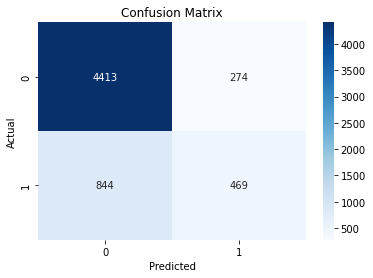

In [34]:
conf_mat1 = confusion_matrix(y_test, pred)
sns.heatmap(conf_mat1, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(f"Accuracy: {accuracy_score(y_test, pred)}")


Accuracy: 0.8136666666666666


An accuracy score of 0.8136666666666666 means that the Random Forest classifier correctly classified approximately 81.37% of the instances in the test dataset.

In [36]:
#Classification report
print(f"Classification Report {classification_report(y_test, pred)}")

Classification Report               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000




**Accuracy**: The overall accuracy of the model is 0.81, which means that it correctly classified 81% of the instances in the test dataset.

**Class-wise Metrics**:
- Class 0:
  - Precision: 0.84 (Out of the instances predicted as Class 0, 84% were actually Class 0)
  - Recall: 0.94 (The model correctly identified 94% of the instances belonging to Class 0)
  - F1-score: 0.89 (The harmonic mean of precision and recall for Class 0)
  - Support: 4687 (The number of instances belonging to Class 0 in the test dataset)

- Class 1:
  - Precision: 0.63 (Out of the instances predicted as Class 1, 63% were actually Class 1)
  - Recall: 0.36 (The model correctly identified 36% of the instances belonging to Class 1)
  - F1-score: 0.46
  - Support: 1313 (The number of instances belonging to Class 1 in the test dataset)





***Gradient Boost Classifier***

In [37]:
gbc= GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [38]:
g_prediction= gbc.predict(X_test)


In [39]:
print(f"Accuracy: {accuracy_score(y_test, g_prediction)}")


Accuracy: 0.8205


An accuracy score of 0.8205 means that the Gradient Boosting Classifier correctly classified approximately 82.05% of the instances in the test dataset.

In [42]:
print(f"Classification Report:\n{classification_report(y_test, g_prediction)}")


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



Accuracy: The overall accuracy of the model is 0.82, which means that it correctly classified 82% of the instances in the test dataset.

Class-wise Metrics:

Class 0:
Precision: 0.84 (Out of the instances predicted as Class 0, 84% were actually Class 0)
Recall: 0.95 (The model correctly identified 95% of the instances belonging to Class 0)
F1-score: 0.89 (The harmonic mean of precision and recall for Class 0)
Support: 4687 (The number of instances belonging to Class 0 in the test dataset)

Class 1:
Precision: 0.67 (Out of the instances predicted as Class 1, 67% were actually Class 1)
Recall: 0.35 (The model correctly identified 35% of the instances belonging to Class 1)
F1-score: 0.46
Support: 1313 (The number of instances belonging to Class 1 in the test dataset)

In [41]:
print(f"Confusion Matrix:\n{confusion_matrix(y_test, g_prediction)}")

Confusion Matrix:
[[4458  229]
 [ 848  465]]


***Conclusion***

Based on the accuracy scores, the Gradient Boosting Classifier has the highest accuracy of 0.82, followed by the Random Forest Classifier with 0.81, and the Logistic Regression model with 0.78.

Additionally, the Gradient Boosting Classifier seems to perform better than the other two models in terms of precision and recall for the minority class (Class 1), although its performance for this class is still relatively weaker compared to Class 0.